# Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data.csv')

In [4]:
df

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


# Exploratory Data Analysis

In [30]:
df.shape

(100, 3)

In [5]:
df.info

<bound method DataFrame.info of        F     N  Prprice per square foot
0   0.44  0.68                   511.14
1   0.99  0.23                   717.10
2   0.84  0.29                   607.91
3   0.28  0.45                   270.40
4   0.07  0.83                   289.88
..   ...   ...                      ...
95  0.99  0.13                   636.22
96  0.28  0.46                   272.12
97  0.87  0.36                   696.65
98  0.23  0.87                   434.53
99  0.77  0.36                   593.86

[100 rows x 3 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [8]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

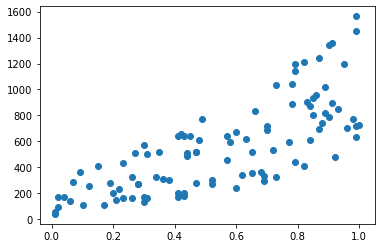

In [45]:
plt.scatter(df['F'],df['Prprice per square foot'])
plt.show()

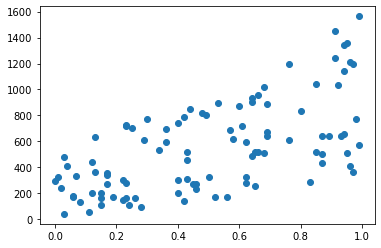

In [46]:
plt.scatter(df['N'],df['Prprice per square foot'])
plt.show()

<AxesSubplot:xlabel='Prprice per square foot', ylabel='F'>

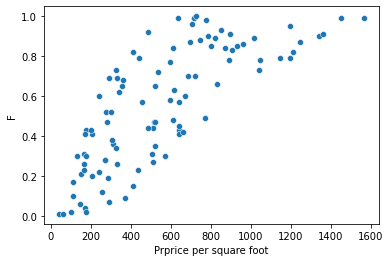

In [48]:
sns.scatterplot(x='Prprice per square foot',y='F',data=df)

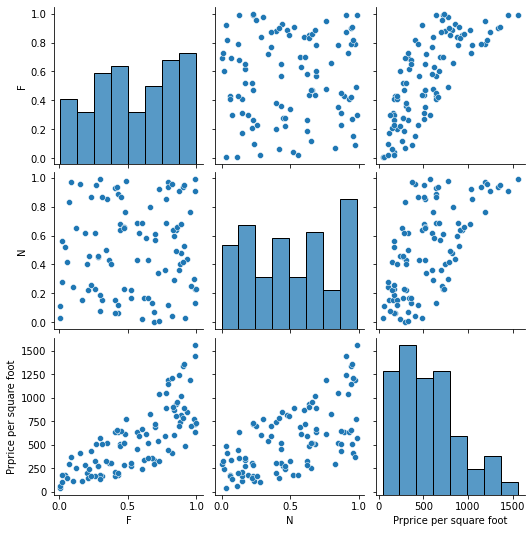

In [49]:
sns.pairplot(df)

Data points in this dataset has a curve path hence we go for polynomial

# Training for Linear Regression

In [34]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X = X.reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=3)

# Linear regression on trained data

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# 2nd Degree poly nomial Line

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train)
line_reg2=LinearRegression()
line_reg2.fit(x_poly,y_train)


LinearRegression()

In [53]:
y_pred2=line_reg2.predict(poly_reg.fit_transform(x_test))
y_pred2

array([494.82902873, 974.38627871, 897.88529761, 353.21652899,
       494.82902873, 607.2514069 , 845.69451566, 615.4003057 ,
       320.78375636, 329.64146683, 640.33755732, 930.18087717,
       508.75580956, 430.10067655, 825.39051728, 974.38627871,
       575.47340367, 288.62328247, 930.18087717, 738.06960493,
       274.50526631, 674.73185493, 866.32555084, 805.4135557 ,
       941.10958876, 292.35718451, 474.55205148, 455.01090703,
       941.10958876, 304.04944582])

# 3rd Degree polynomial Line

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
line_reg3=LinearRegression()
line_reg3.fit(x_poly,y_train)

LinearRegression()

In [55]:
y_pred3=line_reg3.predict(poly_reg.fit_transform(x_test))
y_pred3

array([496.38382546, 990.02520246, 900.84010624, 361.16570412,
       496.38382546, 600.37258372, 842.54456171, 608.08202941,
       325.14413753, 335.38917438, 631.87998971, 937.94404936,
       509.12545067, 436.71684749, 820.41346326, 990.02520246,
       570.58980332, 284.08093152, 937.94404936, 728.61388936,
       263.24314035, 665.25850872, 865.34485862, 798.93325233,
       950.68019965, 289.24513299, 477.81658631, 459.84865277,
       950.68019965, 304.66576811])

In [56]:
from sklearn import metrics
import statsmodels.api as sm

In [57]:
print(metrics.mean_squared_error(y_test,y_pred2))
print(metrics.mean_squared_error(y_test,y_pred3))

90294.87301671809
90448.23762126692


Here means squared error is almost same

In [59]:
y_pred2

array([494.82902873, 974.38627871, 897.88529761, 353.21652899,
       494.82902873, 607.2514069 , 845.69451566, 615.4003057 ,
       320.78375636, 329.64146683, 640.33755732, 930.18087717,
       508.75580956, 430.10067655, 825.39051728, 974.38627871,
       575.47340367, 288.62328247, 930.18087717, 738.06960493,
       274.50526631, 674.73185493, 866.32555084, 805.4135557 ,
       941.10958876, 292.35718451, 474.55205148, 455.01090703,
       941.10958876, 304.04944582])

In [58]:
y_pred3

array([496.38382546, 990.02520246, 900.84010624, 361.16570412,
       496.38382546, 600.37258372, 842.54456171, 608.08202941,
       325.14413753, 335.38917438, 631.87998971, 937.94404936,
       509.12545067, 436.71684749, 820.41346326, 990.02520246,
       570.58980332, 284.08093152, 937.94404936, 728.61388936,
       263.24314035, 665.25850872, 865.34485862, 798.93325233,
       950.68019965, 289.24513299, 477.81658631, 459.84865277,
       950.68019965, 304.66576811])

In [60]:
x_stat=sm.add_constant(x_train)
Summ=sm.OLS(y_train,x_stat).fit()

In [61]:
Summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     45.67
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           3.87e-09
Time:                        18:48:25   Log-Likelihood:                -487.49
No. Observations:                  70   AIC:                             979.0
Df Residuals:                      68   BIC:                             983.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.6481     58.387      3.437      0.001      84.139     317.157
x1           715.5431    105.887      6.758      0.000     504.249     926.838
==============================================================================
Omnibus:                        7.046   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.860
Skew:                           0.152   Prob(JB):                        0.239
Kurtosis:                       2.058   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

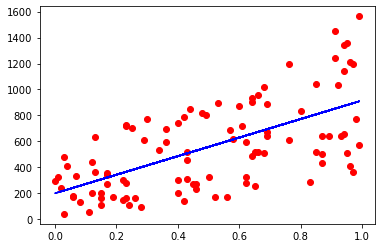

In [62]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

In [66]:
# Linear regression Prediction
lr.predict([[1]])

array([907.80029139])

In [67]:
# Linear regression Prediction
lr.predict([[2]])

array([1617.38425967])

In [68]:
# Linear regression Prediction
lr.predict([[3]])

array([2326.96822795])

In [69]:
# Linear regression Prediction
lr.predict([[4]])

array([3036.55219623])

In [70]:
# Linear regression Prediction
lr.predict([[5]])

array([3746.13616451])